# **Part 1**

In [ ]:
!pip install scikit-fuzzy

In [ ]:
import cv2
import numpy as np
import os
from sklearn.cluster import KMeans
import skfuzzy as fuzz
import matplotlib.pyplot as plt
import matplotlib

In [ ]:
def get_colormap_colors(k, cmap_name="tab10"):
    """Generate k distinct colors from a matplotlib colormap"""
    cmap = plt.get_cmap(cmap_name)
    colors = (cmap(np.linspace(0, 1, k))[:, :3] * 255).astype(np.uint8)
    return colors

def colorize_clusters(labels, h, w, k, cmap_name="tab10"):
    """Map each cluster label to a color from the chosen colormap"""
    colored = np.zeros((h, w, 3), dtype=np.uint8)
    colors = get_colormap_colors(k, cmap_name)
    for cluster_idx in range(k):
        colored[labels.reshape(h, w) == cluster_idx] = colors[cluster_idx]
    return colored

def grayscale_clusters(centers, labels, h, w):
    """Map clusters to grayscale based on their cluster center intensity"""
    gray_values = np.mean(centers, axis=1)
    gray_img = gray_values[labels].reshape(h, w)
    return gray_img.astype(np.uint8)

def segment_kmeans(image, k=3, cmap_name="tab10"):
    """Segment image using K-Means -> both color & grayscale"""
    h, w, c = image.shape
    data = image.reshape((-1, 3))
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(data)
    colored = colorize_clusters(labels, h, w, k, cmap_name)
    gray = grayscale_clusters(kmeans.cluster_centers_, labels, h, w)
    return colored, gray

def segment_fcm(image, k=3, cmap_name="tab10"):
    """Segment image using Fuzzy C-Means -> both color & grayscale"""
    h, w, c = image.shape
    data = image.reshape((-1, 3)).T
    cntr, u, _, _, _, _, _ = fuzz.cluster.cmeans(
        data, c=k, m=2, error=0.005, maxiter=1000, init=None
    )
    labels = np.argmax(u, axis=0)
    colored = colorize_clusters(labels, h, w, k, cmap_name)
    gray = grayscale_clusters(cntr, labels, h, w)
    return colored, gray

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


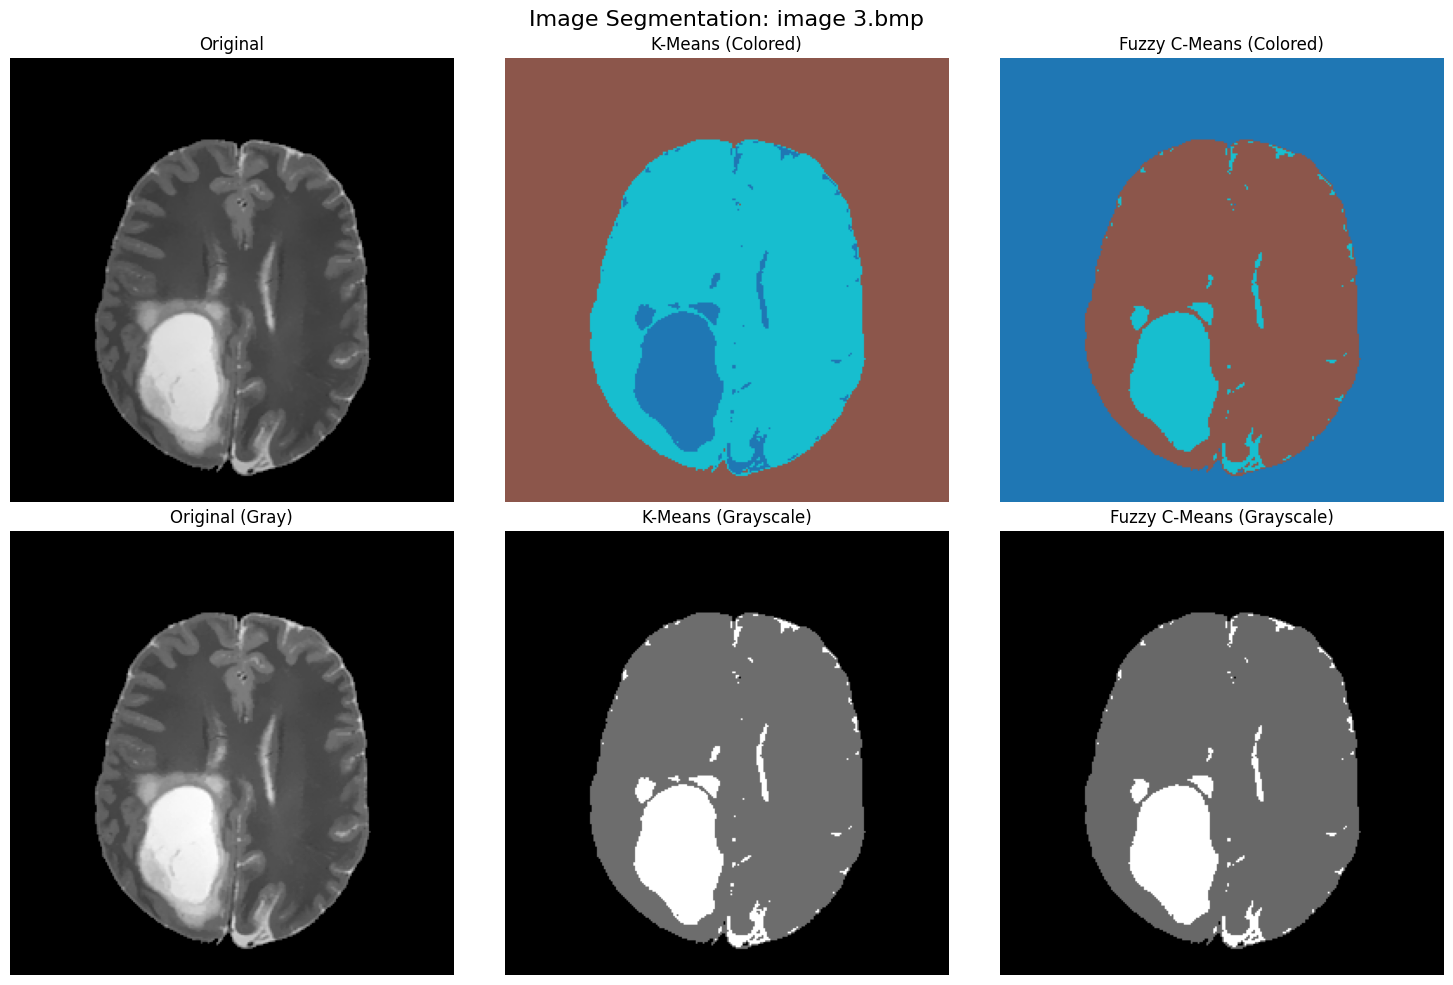

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


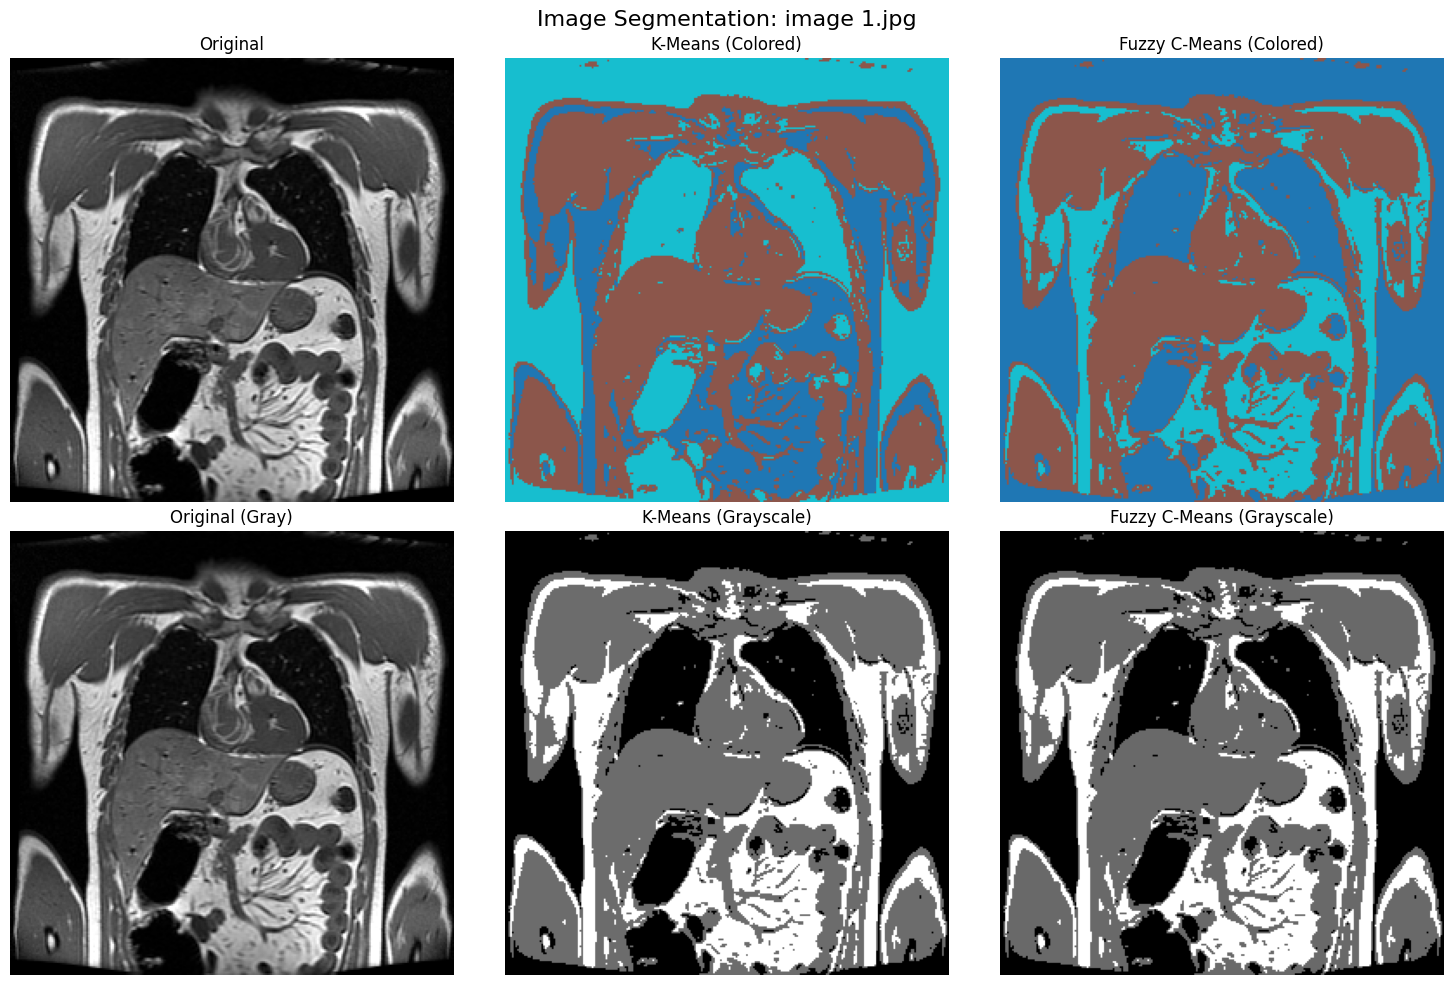

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


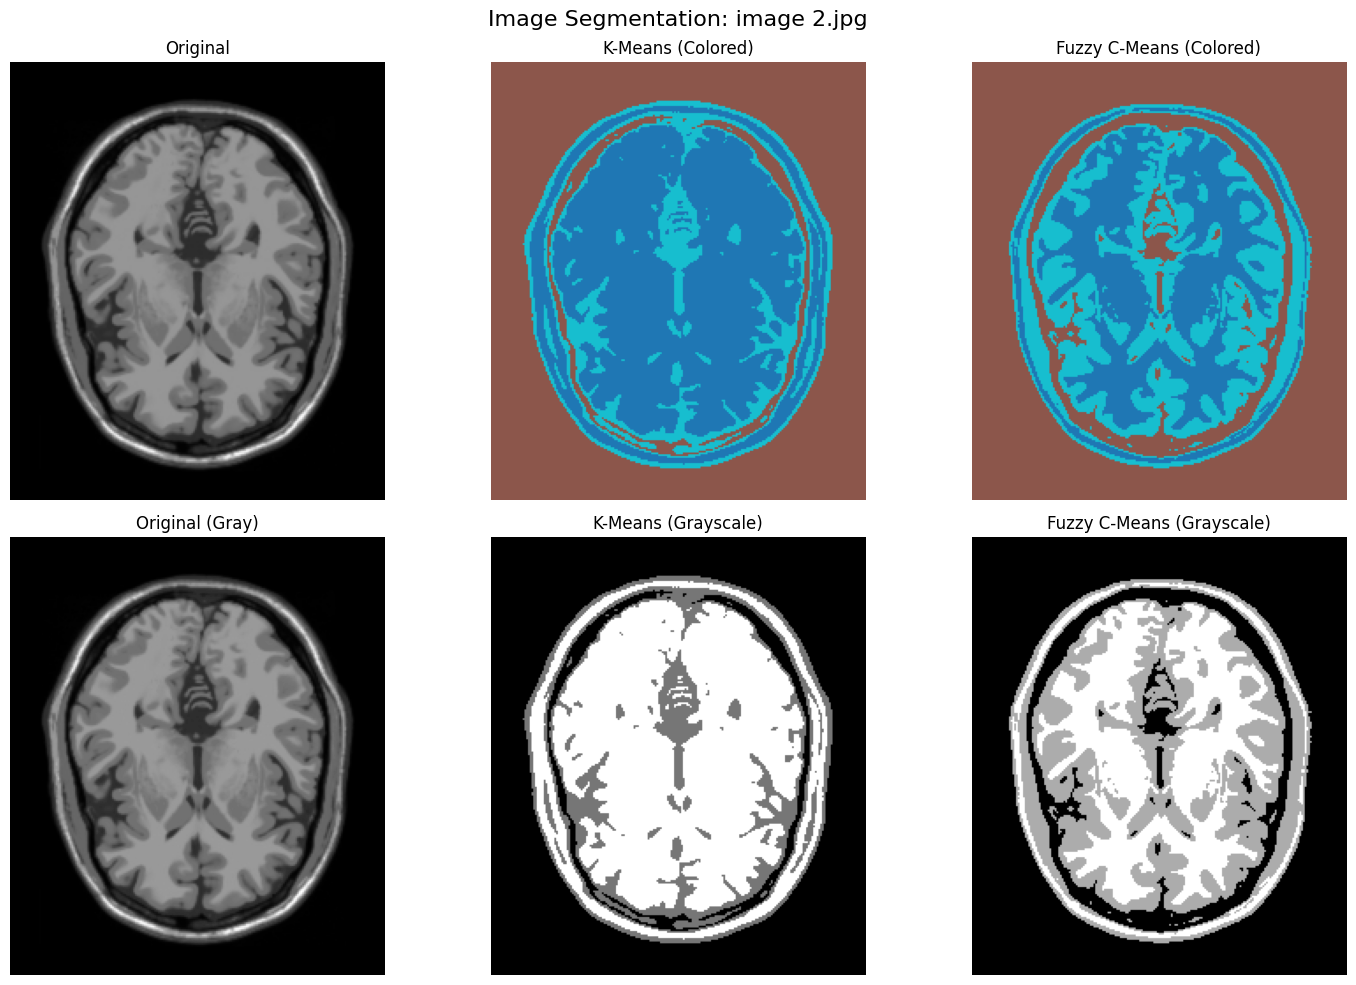

In [ ]:
# === Parameters ===
NUM_CLUSTERS = 3
INPUT_FOLDER = "/kaggle/input/q2-data/Q2"
COLORMAP_NAME = "tab10"


# === Process & Plot each image ===
for filename in os.listdir(INPUT_FOLDER):
    if filename.lower().endswith((".jpg", ".jpeg", ".png", ".bmp")):
        img_path = os.path.join(INPUT_FOLDER, filename)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Segmentation
        kmeans_colored, kmeans_gray = segment_kmeans(img, NUM_CLUSTERS, COLORMAP_NAME)
        fcm_colored, fcm_gray = segment_fcm(img, NUM_CLUSTERS, COLORMAP_NAME)

        # Plot results
        fig, axes = plt.subplots(2, 3, figsize=(15, 10))

        # Original + Colored
        axes[0,0].imshow(img)
        axes[0,0].set_title("Original")
        axes[0,0].axis("off")

        axes[0,1].imshow(kmeans_colored)
        axes[0,1].set_title(f"K-Means (Colored)")
        axes[0,1].axis("off")

        axes[0,2].imshow(fcm_colored)
        axes[0,2].set_title(f"Fuzzy C-Means (Colored)")
        axes[0,2].axis("off")

        # Grayscale versions
        axes[1,0].imshow(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY), cmap="gray")
        axes[1,0].set_title("Original (Gray)")
        axes[1,0].axis("off")

        axes[1,1].imshow(kmeans_gray, cmap="gray")
        axes[1,1].set_title(f"K-Means (Grayscale)")
        axes[1,1].axis("off")

        axes[1,2].imshow(fcm_gray, cmap="gray")
        axes[1,2].set_title(f"Fuzzy C-Means (Grayscale)")
        axes[1,2].axis("off")

        plt.suptitle(f"Image Segmentation: {filename}", fontsize=16)
        plt.tight_layout()
        plt.show()


# **Part 2**

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 158MB/s] 


Processing image 3.bmp with ResNet deep features...


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


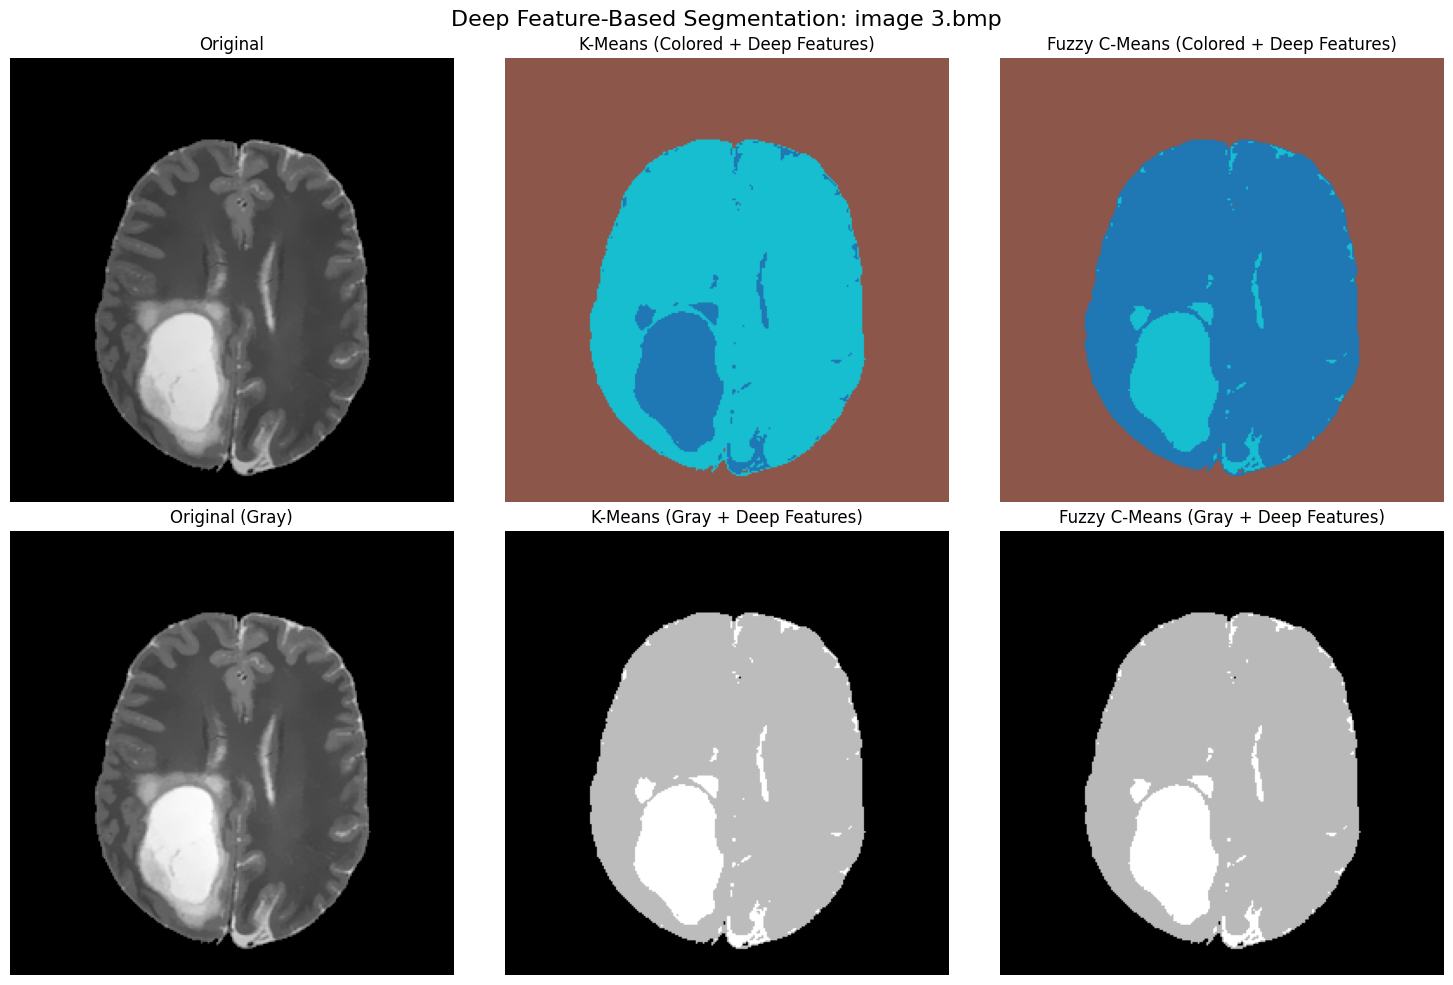

Processing image 1.jpg with ResNet deep features...


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


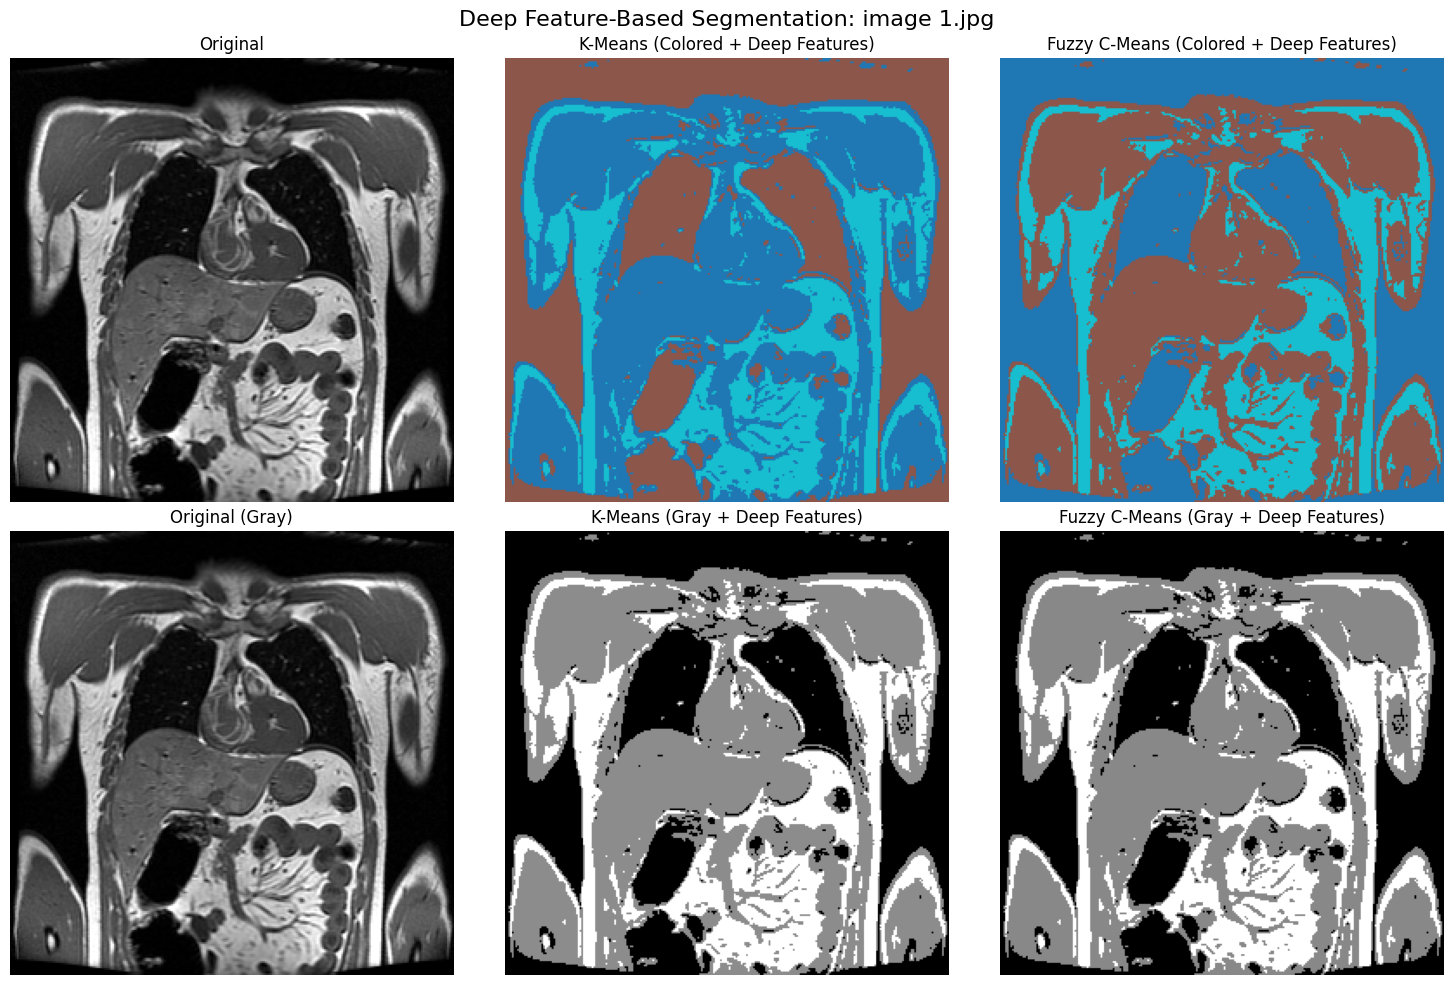

Processing image 2.jpg with ResNet deep features...


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


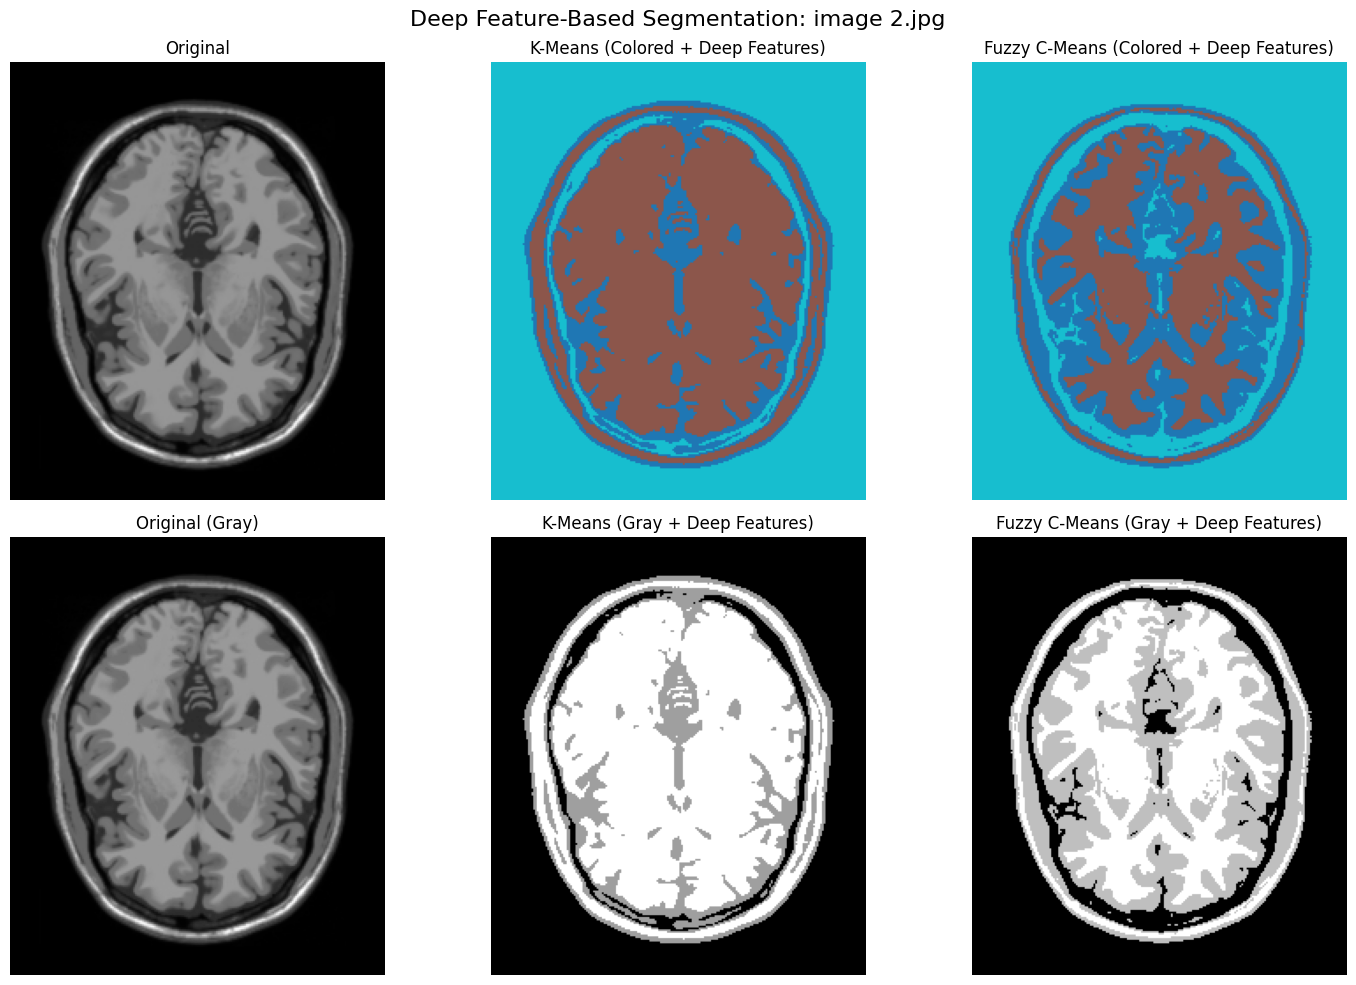

In [ ]:
import os
import cv2
import numpy as np
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms
from sklearn.cluster import KMeans
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# === Parameters ===
NUM_CLUSTERS = 3
INPUT_FOLDER = "/kaggle/input/q2-data/Q2"
COLORMAP_NAME = "tab10"  # matplotlib colormap for distinct colors
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

# === Load Pretrained ResNet for Feature Extraction ===
resnet = models.resnet50(pretrained=True)
resnet.eval().to(DEVICE)
feature_extractor = nn.Sequential(*list(resnet.children())[:-2]).to(DEVICE)

# === Image preprocessing for ResNet ===
transform_resnet = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# === Get distinct colors from a colormap ===
def get_colormap_colors(k, cmap_name="tab10"):
    cmap = plt.get_cmap(cmap_name)
    colors = (cmap(np.linspace(0, 1, k))[:, :3] * 255).astype(np.uint8)
    return colors

def colorize_clusters(labels, h, w, k, cmap_name="tab10"):
    colored = np.zeros((h, w, 3), dtype=np.uint8)
    colors = get_colormap_colors(k, cmap_name)
    for cluster_idx in range(k):
        colored[labels.reshape(h, w) == cluster_idx] = colors[cluster_idx]
    return colored

def grayscale_clusters(centers, labels, h, w):
    """Convert cluster centers to grayscale and normalize for display"""
    gray_values = np.mean(centers, axis=1)

    gray_img = gray_values[labels].reshape(h, w)

    gray_img = (gray_img - gray_img.min()) / (gray_img.max() - gray_img.min() + 1e-8)
    gray_img = (gray_img * 255).astype(np.uint8)

    return gray_img


# === Extract deep features from ResNet ===
def extract_resnet_features(img):
    img_resized = cv2.resize(img, (224, 224))
    img_tensor = transform_resnet(img_resized).unsqueeze(0).to(DEVICE)
    with torch.no_grad():
        features = feature_extractor(img_tensor)
    feat = features.squeeze(0).cpu().numpy()
    return feat

# === Build full feature vector per pixel ===
def build_feature_vector(img):
    h, w, c = img.shape

    # Extract ResNet deep features
    deep_features = extract_resnet_features(img)

    # Resize each deep feature map to original size
    deep_features_resized = np.zeros((deep_features.shape[0], h, w))
    for i in range(deep_features.shape[0]):
        deep_features_resized[i] = cv2.resize(deep_features[i], (w, h))

    # Flatten deep features
    deep_feat_flat = deep_features_resized.reshape(deep_features.shape[0], -1).T

    # Flatten original RGB
    img_flat = img.reshape(-1, 3)

    # Concatenate
    combined_features = np.concatenate([img_flat, deep_feat_flat], axis=1)

    return combined_features, h, w

# === K-Means Segmentation ===
def segment_kmeans_with_features(img, k=NUM_CLUSTERS):
    features, h, w = build_feature_vector(img)
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(features)
    colored = colorize_clusters(labels, h, w, k)
    gray = grayscale_clusters(kmeans.cluster_centers_, labels, h, w)
    return colored, gray

# === Fuzzy C-Means Segmentation ===
def segment_fcm_with_features(img, k=NUM_CLUSTERS):
    features, h, w = build_feature_vector(img)
    data_T = features.T
    cntr, u, _, _, _, _, _ = fuzz.cluster.cmeans(
        data_T, c=k, m=2, error=0.005, maxiter=1000, init=None
    )
    labels = np.argmax(u, axis=0)
    colored = colorize_clusters(labels, h, w, k)
    gray = grayscale_clusters(cntr, labels, h, w)
    return colored, gray

# === Process all images ===
for filename in os.listdir(INPUT_FOLDER):
    if filename.lower().endswith((".jpg", ".jpeg", ".png", ".bmp")):
        img_path = os.path.join(INPUT_FOLDER, filename)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        print(f"Processing {filename} with ResNet deep features...")

        # Segmentations
        kmeans_colored, kmeans_gray = segment_kmeans_with_features(img)
        fcm_colored, fcm_gray = segment_fcm_with_features(img)

        # Plot results
        fig, axes = plt.subplots(2, 3, figsize=(15, 10))

        #Original + Colored segmentations
        axes[0,0].imshow(img)
        axes[0,0].set_title("Original")
        axes[0,0].axis("off")

        axes[0,1].imshow(kmeans_colored)
        axes[0,1].set_title("K-Means (Colored + Deep Features)")
        axes[0,1].axis("off")

        axes[0,2].imshow(fcm_colored)
        axes[0,2].set_title("Fuzzy C-Means (Colored + Deep Features)")
        axes[0,2].axis("off")

        # Row 2: Original gray + grayscale segmentations
        axes[1,0].imshow(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY), cmap="gray")
        axes[1,0].set_title("Original (Gray)")
        axes[1,0].axis("off")

        axes[1,1].imshow(kmeans_gray, cmap="gray")
        axes[1,1].set_title("K-Means (Gray + Deep Features)")
        axes[1,1].axis("off")

        axes[1,2].imshow(fcm_gray, cmap="gray")
        axes[1,2].set_title("Fuzzy C-Means (Gray + Deep Features)")
        axes[1,2].axis("off")

        plt.suptitle(f"Deep Feature-Based Segmentation: {filename}", fontsize=16)
        plt.tight_layout()
        plt.show()


# **Part 3**

In [ ]:
!pip install git+https://github.com/facebookresearch/segment-anything.git

  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-r57oa1wm
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-r57oa1wm
  Resolved https://github.com/facebookresearch/segment-anything.git to commit dca509fe793f601edb92606367a655c15ac00fdf
  Preparing metadata (setup.py) ... done


Processing image 3.bmp with SAM...


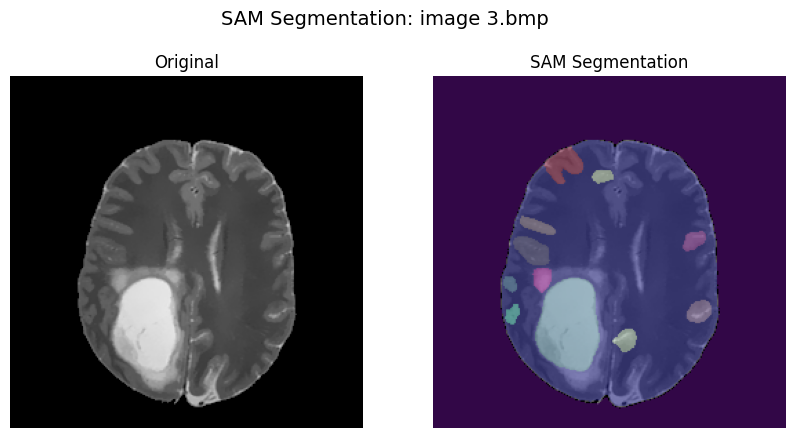

Processing image 1.jpg with SAM...


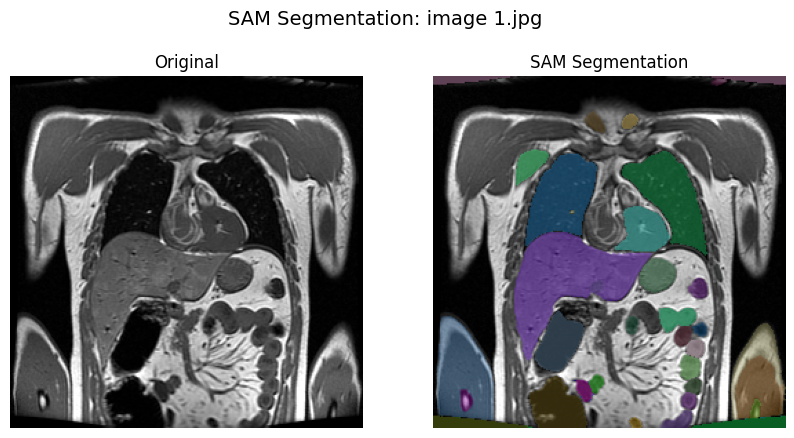

Processing image 2.jpg with SAM...


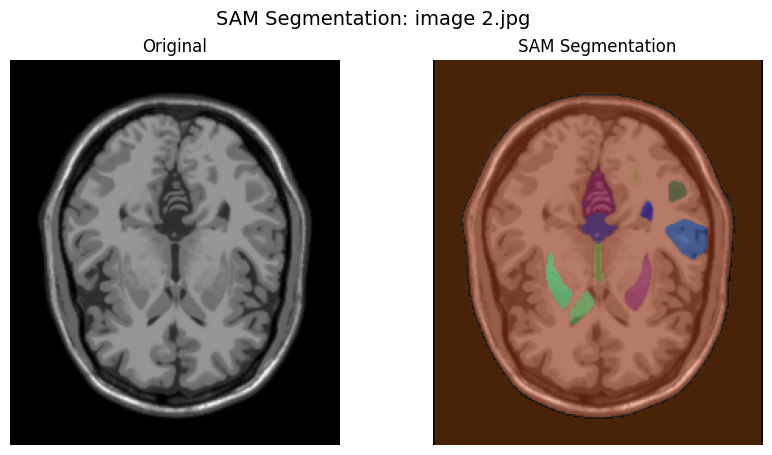

In [ ]:
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# === SAM IMPORTS ===
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator

# === Parameters ===
INPUT_FOLDER = "/kaggle/input/q2-data/Q2"               # Folder containing images
MODEL_PATH = "/kaggle/input/sam_model/pytorch/default/1/SAM Model Checkpoint.pth"  # Path to SAM model checkpoint
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

# === Load SAM model ===
sam = sam_model_registry["vit_h"](checkpoint=MODEL_PATH)
sam.to(device=DEVICE)
mask_generator = SamAutomaticMaskGenerator(sam)

def show_mask_on_image(image, masks):
    """Overlay SAM masks on the original image"""
    overlay = image.copy()
    for mask in masks:
        color = np.random.randint(0, 255, (3,), dtype=np.uint8)
        overlay[mask["segmentation"]] = color
    blended = cv2.addWeighted(image, 0.6, overlay, 0.4, 0)
    return blended

# === Process all images ===
for filename in os.listdir(INPUT_FOLDER):
    if filename.lower().endswith((".jpg", ".jpeg", ".png", ".bmp")):
        img_path = os.path.join(INPUT_FOLDER, filename)
        image_bgr = cv2.imread(img_path)
        image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

        print(f"Processing {filename} with SAM...")

        # Generate masks automatically
        masks = mask_generator.generate(image_rgb)

        # Overlay masks on the image
        segmented_image = show_mask_on_image(image_rgb, masks)

        # Plot result
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(image_rgb)
        plt.title("Original")
        plt.axis("off")

        plt.subplot(1, 2, 2)
        plt.imshow(segmented_image)
        plt.title("SAM Segmentation")
        plt.axis("off")

        plt.suptitle(f"SAM Segmentation: {filename}", fontsize=14)
        plt.show()


# **Part 4: Segmentation Method Comparison**

We evaluated **three different medical images** (brain MRI with tumor, normal brain MRI, and abdominal MRI) using **three segmentation approaches**:

1. **K-Means & Fuzzy C-Means (raw pixel intensity)**
2. **K-Means & Fuzzy C-Means (deep features extracted from ResNet)**
3. **SAM – Segment Anything Model (Meta AI)**

Below is the **combined analysis** of all methods across all images.

---

## **1. K-Means & Fuzzy C-Means (Raw Pixel Clustering)**

**General Behavior:**

* Works purely based on **pixel intensity**.
* Segments into **homogeneous regions** with similar brightness.
* No semantic understanding of anatomy.

**Image 1 (Abdomen MRI):**

* Separated **air vs soft tissue vs background**, but failed to distinguish **individual organs** like liver or lungs.
* Coarse segmentation with little anatomical detail.

**Image 2 (Normal Brain MRI):**

* Roughly separated **gray matter, white matter, and background**, but ventricles and deeper structures merged together.
* Fuzzy C-Means captured **slightly more cortical details**, but still lacked fine structures.

**Image 3 (Brain MRI with Tumor):**

* Tumor appeared as a **distinct region**, but boundaries were **rough and blocky**.
* Background separation worked but **healthy tissue vs tumor not perfectly separated**.

**Strengths:**

* Simple and fast.
* Works reasonably for basic **intensity-based tissue segmentation**.

**Weaknesses:**

* Misses anatomical meaning.
* Sensitive to noise.
* Cannot differentiate tissues with similar intensity.

---

## **2. K-Means & Fuzzy C-Means (Deep Features from ResNet)**

**General Behavior:**

* Uses **high-level semantic features** from ResNet, so clustering is based on **texture and learned patterns**, not just intensity.
* Improves region separation compared to raw pixel clustering.

**Image 1 (Abdomen MRI):**

* Better **organ separation**—lungs and liver more distinct.
* Still merged some smaller organs (not organ-specific segmentation).

**Image 2 (Normal Brain MRI):**

* Improved **gray vs white matter boundary clarity**.
* Cortical folds and some internal structures were more distinguishable.

**Image 3 (Brain MRI with Tumor):**

* Tumor segmentation improved—**more distinct from healthy brain tissue**.
* Reduced noise and gave **cleaner cluster boundaries**.

**Strengths:**

* Adds **contextual understanding** → better than raw intensity clustering.
* Reduced noise, smoother boundaries.

**Weaknesses:**

* Still **unsupervised**, so it does not map exactly to anatomy.
* Cannot fully separate **complex internal structures**.

---

## **3. SAM (Segment Anything Model)**

**General Behavior:**

* Pretrained on **billions of images**, can segment **any region** in a zero-shot way.
* Produces **multiple fine-grained masks** per image.

**Image 1 (Abdomen MRI):**

* **Highly detailed segmentation** → lungs, liver, diaphragm, and even small organs got distinct masks.
* Over-segmentation: too many small masks, requiring post-processing.

**Image 2 (Normal Brain MRI):**

* **Clear anatomical segmentation** → cortical regions, ventricles, and deep brain structures appeared as separate masks.
* More detailed than clustering, with **better anatomical alignment**.

**Image 3 (Brain MRI with Tumor):**

* Tumor region clearly separated as a **unique large mask**.
* Also segmented **small surrounding structures** with high precision.

**Strengths:**

* **Best anatomical detail**.
* Works zero-shot → no need for retraining.
* Handles complex structures well.

**Weaknesses:**

* **Over-segmentation** → too many small masks.
* Needs **manual mask selection or merging** for clinical use.
* More computationally expensive.

---

## **Comparative Summary**

| Method                   | Complexity | Anatomical Detail | Tumor Detection | Organ Separation | Noise Sensitivity |
| ------------------------ | ---------- | ----------------- | --------------- | ---------------- | ----------------- |
| **K-Means (raw)**        | ✅ simple   | ❌ low             | ✅ coarse        | ❌ poor           | ❌ high            |
| **Fuzzy C-Means (raw)**  | ✅ simple   | ❌ low-moderate    | ✅ coarse        | ❌ poor           | ❌ high            |
| **K-Means (deep)**       | ✅ moderate | ✅ moderate        | ✅ better        | ✅ improved       | ✅ less noise      |
| **Fuzzy C-Means (deep)** | ✅ moderate | ✅ moderate        | ✅ better        | ✅ improved       | ✅ less noise      |
| **SAM**                  | ❌ high     | ✅✅ high           | ✅✅ best         | ✅✅ best          | ✅ robust          |

---

## **Final Conclusion**

* **Raw clustering (K-Means/FCM)** is useful for **basic tissue separation** (e.g., gray vs white matter, background vs organ) but lacks anatomical precision.
* **Deep-feature clustering** improves segmentation by adding **semantic understanding**, making it better for distinguishing tumor vs healthy tissue.
* **SAM** is the most **anatomically accurate**, identifying fine structures and boundaries, but it **over-segments** and may require **post-processing** for meaningful clinical interpretation.

In practical use:

* For **quick, simple segmentation** → clustering is enough.
* For **detailed anatomical segmentation** → SAM is the best choice.
* For **tumor detection** → deep-feature clustering + SAM together would give the best balance.
